# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인
* ![참고도서](img/title.jpg)

# 데이터 수집
- 서울시 자치구 년도별 CCTV 설치 현황
https://opengov.seoul.go.kr/data/11124500

- 서울시 서울통계, 서울시 주민등록인구 (구별) 통계
https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

## 1. 엑셀파일 읽기 - 서울시 자치구별 CCTV

In [1]:
import pandas as pd

In [4]:
CCTV_Seoul = pd.read_csv('data/서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv', encoding='cp949', skiprows=[0,2])
CCTV_Seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,772",813,0,0,210,150,1,261,85,9,200,43
1,중 구,"2,333",16,114,87,77,236,240,372,386,155,361,289
2,용산구,"2,383",34,71,234,125,221,298,351,125,307,617,0
3,성동구,"3,602",448,125,212,105,339,310,874,390,262,461,76
4,광진구,"2,588",35,57,100,187,98,52,675,465,712,175,32


In [5]:
CCTV_Seoul = pd.read_excel('data/01.CCTV_in_Seoul_2018.xlsx')
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [8]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [ ]:
CCTV_Seoul.iloc[0,0]

In [9]:
# 기관명 => 구별
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [10]:
CCTV_Seoul['구별'] = CCTV_Seoul['구별'].str.replace(' ','')
CCTV_Seoul['구별']

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object

## 2. 엑셀파일 읽기 - 서울시 인구현황

In [6]:
pop_Seoul = pd.read_excel('data/서울시주민등록인구(구별)통계.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2021.3/4,합계,4421143,9765869,4739972,5025897,9542256,4636069,4906187,223613,103903,119710,2.16,1592339
3,2021.3/4,종로구,73652,154318,74561,79757,145512,70666,74846,8806,3895,4911,1.98,27776
4,2021.3/4,중구,63267,131943,64274,67669,122858,59853,63005,9085,4421,4664,1.94,24225


In [23]:
pop_Seoul = pd.read_excel('data/01.population_in_Seoul_2018.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018,합계,4263868,10049607,4910849,5138758,9765623,4773899,4991724,283984,136950,147034,2.29,1416131
3,2018,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742
4,2018,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005


In [24]:
# 세번째줄, 자치구(B), 계: D,G,J, 65세고령자(N) 필드만 읽기
pop_Seoul = pd.read_excel('data/01.population_in_Seoul_2018.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [25]:
# 인구수계= 한국인수+외국인
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


# 3. Pandas 기초 복습

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Series 데이터
s = pd.Series([1,3,5,np.nan,6,8])
s

In [ ]:
# 시계열 데이터
dates = pd.date_range('20130101', periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])
df

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
# data frame의 개요
df.info()

In [ ]:
# data 통계량
df.describe()

In [ ]:
df.sort_values(by='B', ascending=False)

In [ ]:
df['A']

In [ ]:
df[0:3]

In [ ]:
df['20130102':'20130104']

In [ ]:
df.loc[dates[0]]

In [ ]:
df.loc[:,['A','B']]

In [ ]:
df.loc['20130102':'20130104',['A','B']]

In [ ]:
df.loc['20130102',['A','B']]

In [ ]:
df.loc[dates[0],'A']

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3:5,0:2]

In [ ]:
df.iloc[[1,2,4],[0,2]]

In [ ]:
df.iloc[1:3,:]

In [ ]:
df.iloc[:,1:3]

In [ ]:
df

In [ ]:
df[df.A > 0]

In [ ]:
# data frame 전체에 조건을 걸면 만족하지 않는 cell은 NaN
df[df > 0]

- 얕은 복사(shallow copy)와 깊은 복사(deep copy)
- https://wikidocs.net/16038

In [ ]:
df2 = df.copy()

In [ ]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

In [ ]:
df2['E'].isin(['two','four'])

In [ ]:
df2[df2['E'].isin(['two','four'])]

In [ ]:
df

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

# 4. CCTV 데이터 파악하기

In [14]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [16]:
CCTV_Seoul.sort_values(by='소계', ascending=True).tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448


In [17]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


#### CCTV 증가율: 2013년 기준 2018년까지의 증가률

In [18]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2018년'] + CCTV_Seoul['2017년'] + \
                       CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                       CCTV_Seoul['2014년']) / CCTV_Seoul['2013년']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,7337.500000
11,동작구,1780,238.0,93.0,29.0,503,130,254,278,255,4896.551724
12,마포구,1935,585.0,108.0,69.0,70,177,359,372,195,1700.000000
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,1514.406780
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367,1429.292929


# 5. 서울시 인구 데이터 파악하기

In [26]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [27]:
# 합계 행 제거
pop_Seoul.drop([0], inplace=True)
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520040,501957,18083,72249
22,서초구,438163,433951,4212,54751
23,강남구,547453,542364,5089,67085
24,송파구,673507,666635,6872,81364
25,강동구,431920,427573,4347,58770


In [28]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [29]:
# 구별 전체인구 대비 외국인, 고령자비율
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139


In [30]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673507,666635,6872,81364,1.020331,12.080647
16,강서구,603611,596949,6662,79660,1.103691,13.197241
11,노원구,548160,543752,4408,77096,0.804145,14.064507
23,강남구,547453,542364,5089,67085,0.929578,12.254020
21,관악구,520040,501957,18083,72249,3.477233,13.892970


In [ ]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

In [ ]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

In [ ]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

In [ ]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

# 6. Pandas 고급 두 DataFrame 병합하기 복습

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

In [ ]:
result = pd.concat([df1, df2, df3])
result

In [ ]:
# key : 다중 index
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

In [ ]:
result.index

In [ ]:
result.index.get_level_values(0)

In [ ]:
result.index.get_level_values(1)

In [ ]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [ ]:
df1

In [ ]:
df4

In [ ]:
result

In [ ]:
#  join='inner': 공통된 index만 합침
result = pd.concat([df1, df4], axis=1, join='inner')
result

In [ ]:
# ignore_index=True: 두 데이터의 indexㄹ르 무시하고 합친 후 다시 index 부여
result = pd.concat([df1, df4], ignore_index=True)
result

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left, right, on='key')

In [ ]:
pd.merge(left, right, how='left', on='key')

In [ ]:
pd.merge(left, right, how='right', on='key')

In [ ]:
pd.merge(left, right, how='outer', on='key')

In [ ]:
pd.merge(left, right, how='inner', on='key')

# 7. CCTV 데이터와 인구 데이터 합치고 분석하기
- 인구 대비 CCTV 현황

In [31]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,875.316456,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,787.313433,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,562.411348,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,953.389831,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,735.083532,520040,501957,18083,72249,3.477233,13.892970


In [32]:
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,875.316456,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,787.313433,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,562.411348,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,953.389831,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,735.083532,520040,501957,18083,72249,3.477233,13.892970


In [34]:
# index 변경 : '구별'
data_result.set_index('구별', inplace=True)
data_result.head()
data_result.describe()

KeyError: "None of ['구별'] are in the columns"

#### CCTV와 데이터(필드) 간 상관계수

In [35]:
data_result.describe()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
count,25.000000,23.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,2219.720000,1284.660291,401984.280000,390624.920000,11359.360000,56645.24000,3.303885,14.372089
std,967.646523,1614.630414,127293.343035,128991.767026,8732.169518,15574.21268,2.666952,1.569577
min,858.000000,143.071786,135633.000000,125725.000000,2236.000000,22005.00000,0.654473,12.080647
25%,1586.000000,559.718070,323080.000000,319164.000000,4469.000000,50456.00000,1.006436,13.197241
50%,1935.000000,875.316456,408147.000000,396203.000000,9908.000000,58045.00000,2.640014,14.069309
75%,2775.000000,1137.835553,468145.000000,464185.000000,15504.000000,67085.00000,4.470025,15.617185
max,5221.000000,7337.500000,673507.000000,666635.000000,35822.000000,81364.00000,8.875619,18.022080


In [36]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.40379375],
       [-0.40379375,  1.        ]])

In [37]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.04143132],
       [-0.04143132,  1.        ]])

In [38]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.37523207],
       [0.37523207, 1.        ]])

In [40]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,875.316456,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,735.083532,520040,501957,18083,72249,3.477233,13.892970
구로구,3227,517.765043,438486,404497,33989,61801,7.751445,14.094179
성북구,3003,603.947368,447687,435868,11819,67782,2.640014,15.140489
은평구,2962,1429.292929,487666,483197,4469,77420,0.916406,15.875620


In [39]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1586,907.954545,673507,666635,6872,81364,1.020331,12.080647
강서구,1617,953.389831,603611,596949,6662,79660,1.103691,13.197241
노원구,1906,544.334975,548160,543752,4408,77096,0.804145,14.064507
강남구,5221,875.316456,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,735.083532,520040,501957,18083,72249,3.477233,13.892970


# 8. 그래프 그리기 기초 - matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

In [ ]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

In [ ]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

In [ ]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [ ]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

In [ ]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

In [ ]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [ ]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

In [ ]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [41]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [42]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,875.316456,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,787.313433,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,562.411348,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,953.389831,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,735.083532,520040,501957,18083,72249,3.477233,13.892970


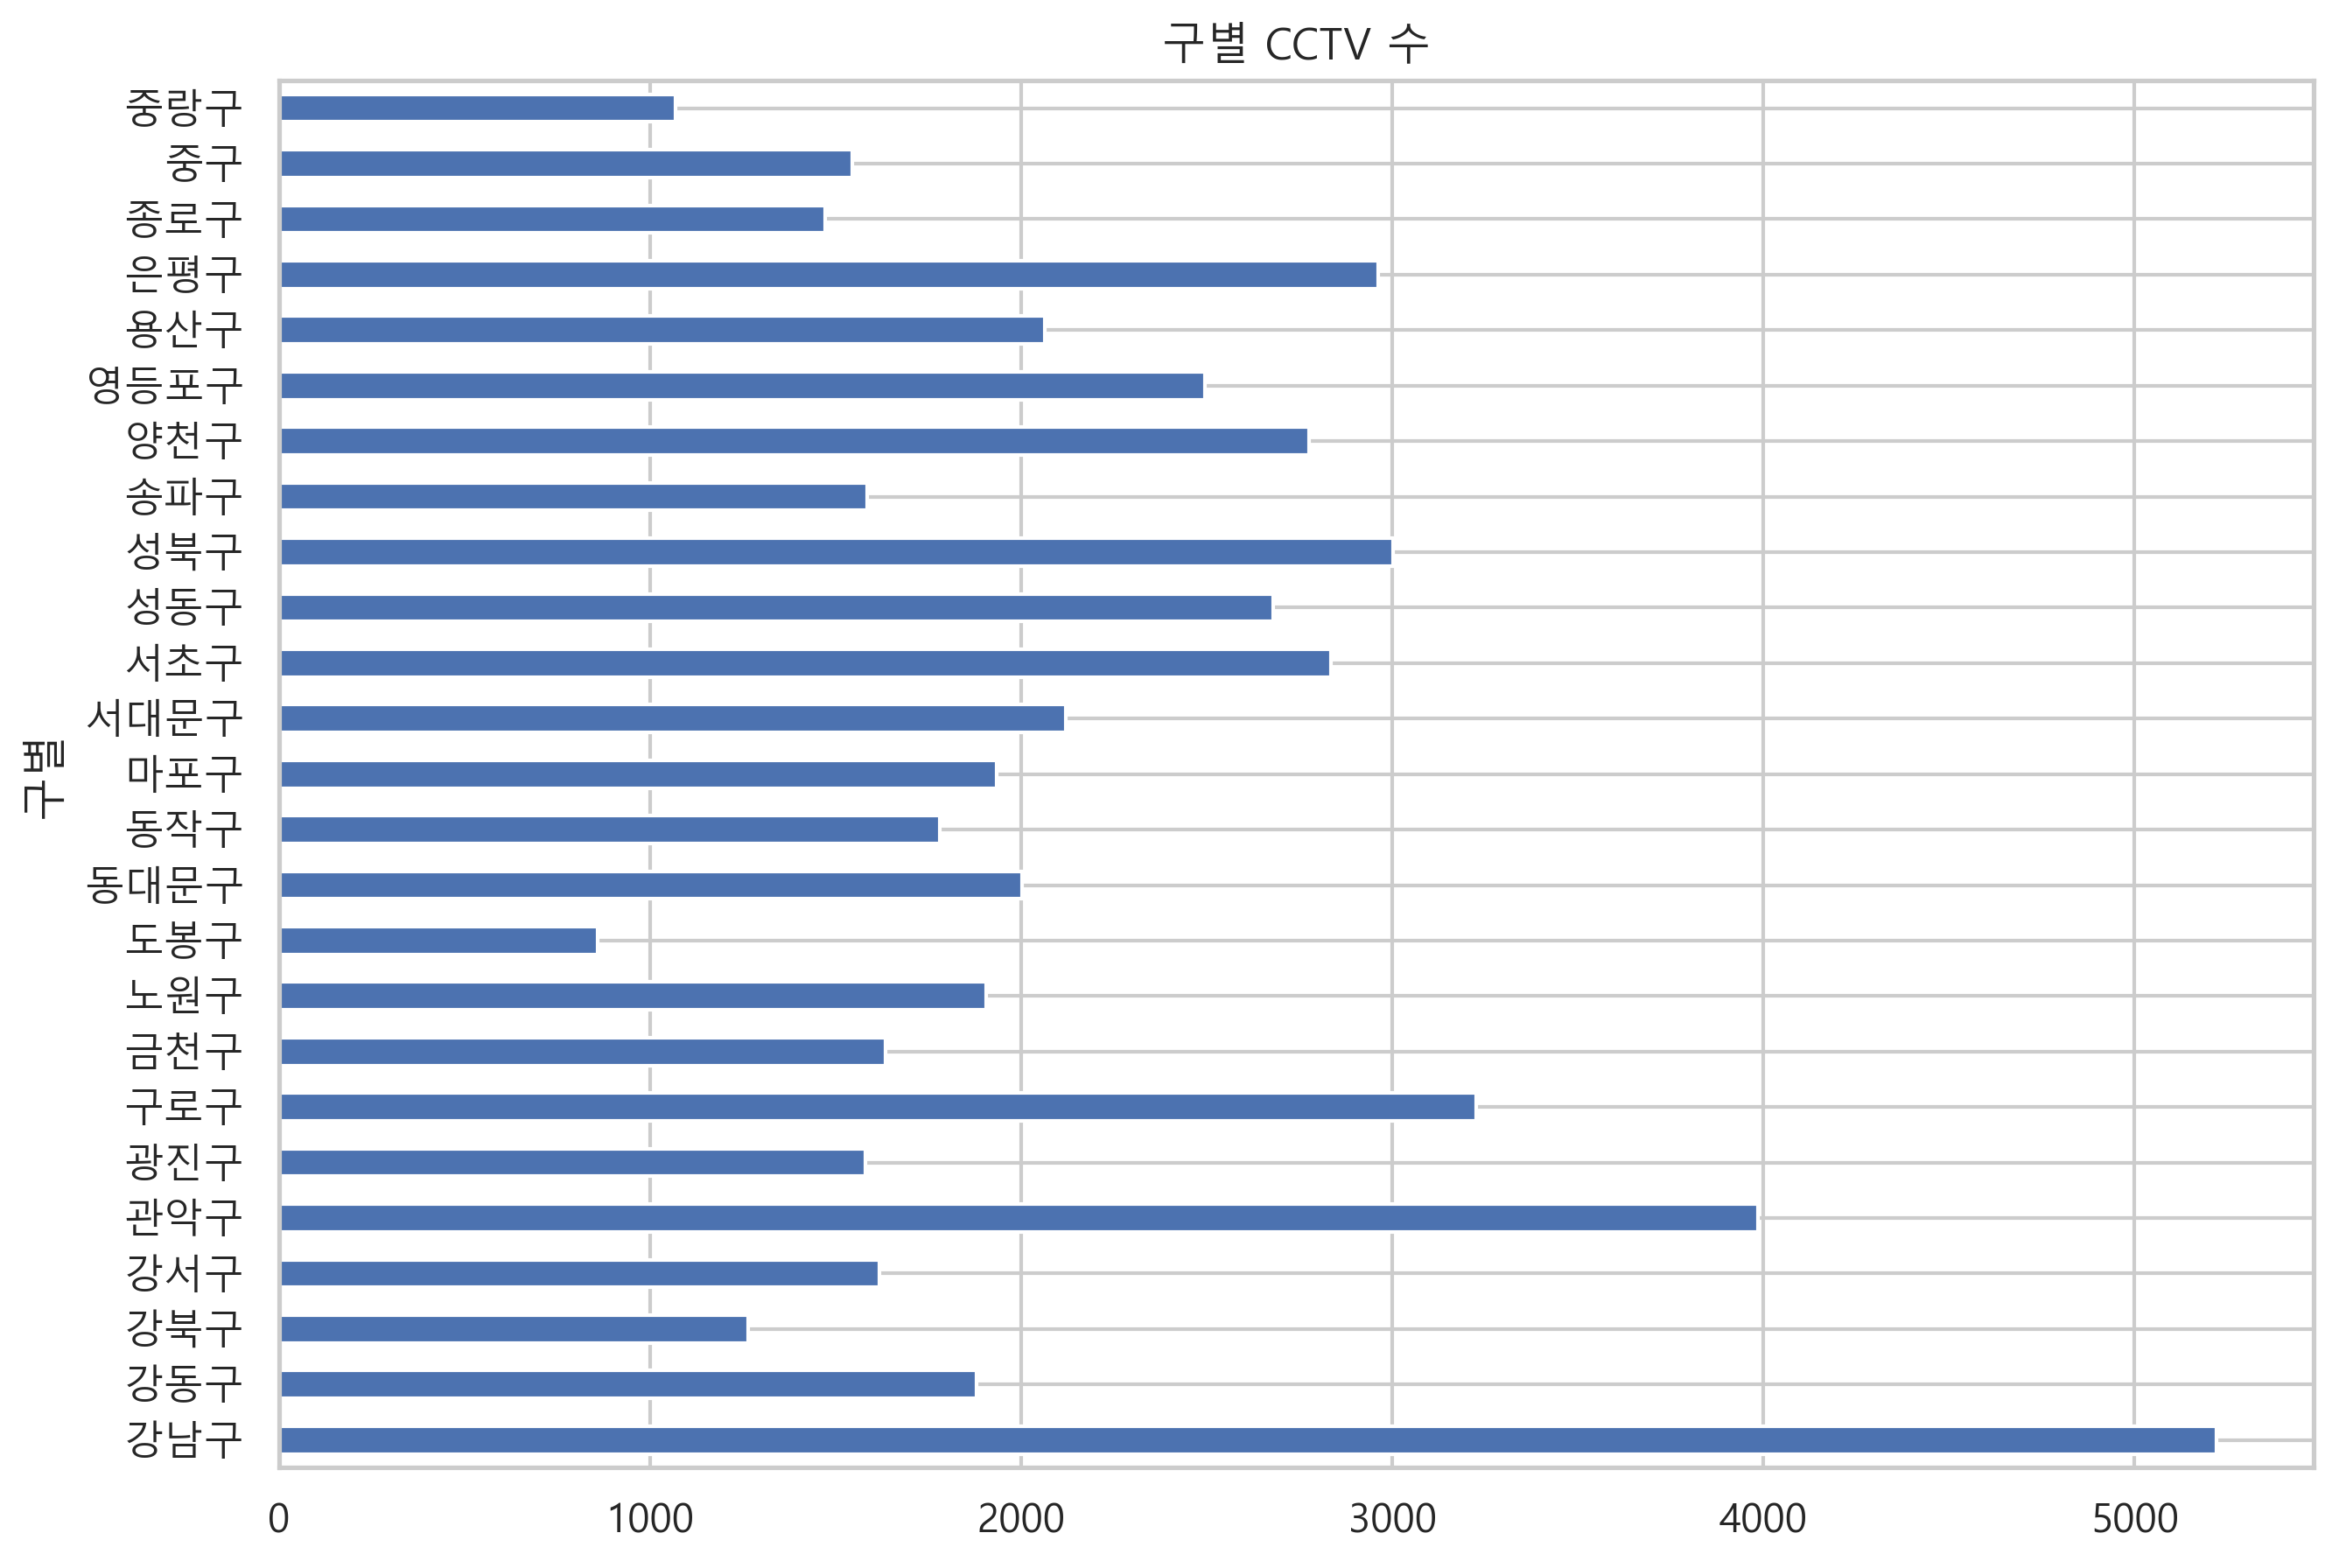

In [43]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,7))
plt.title('구별 CCTV 수')
plt.show()

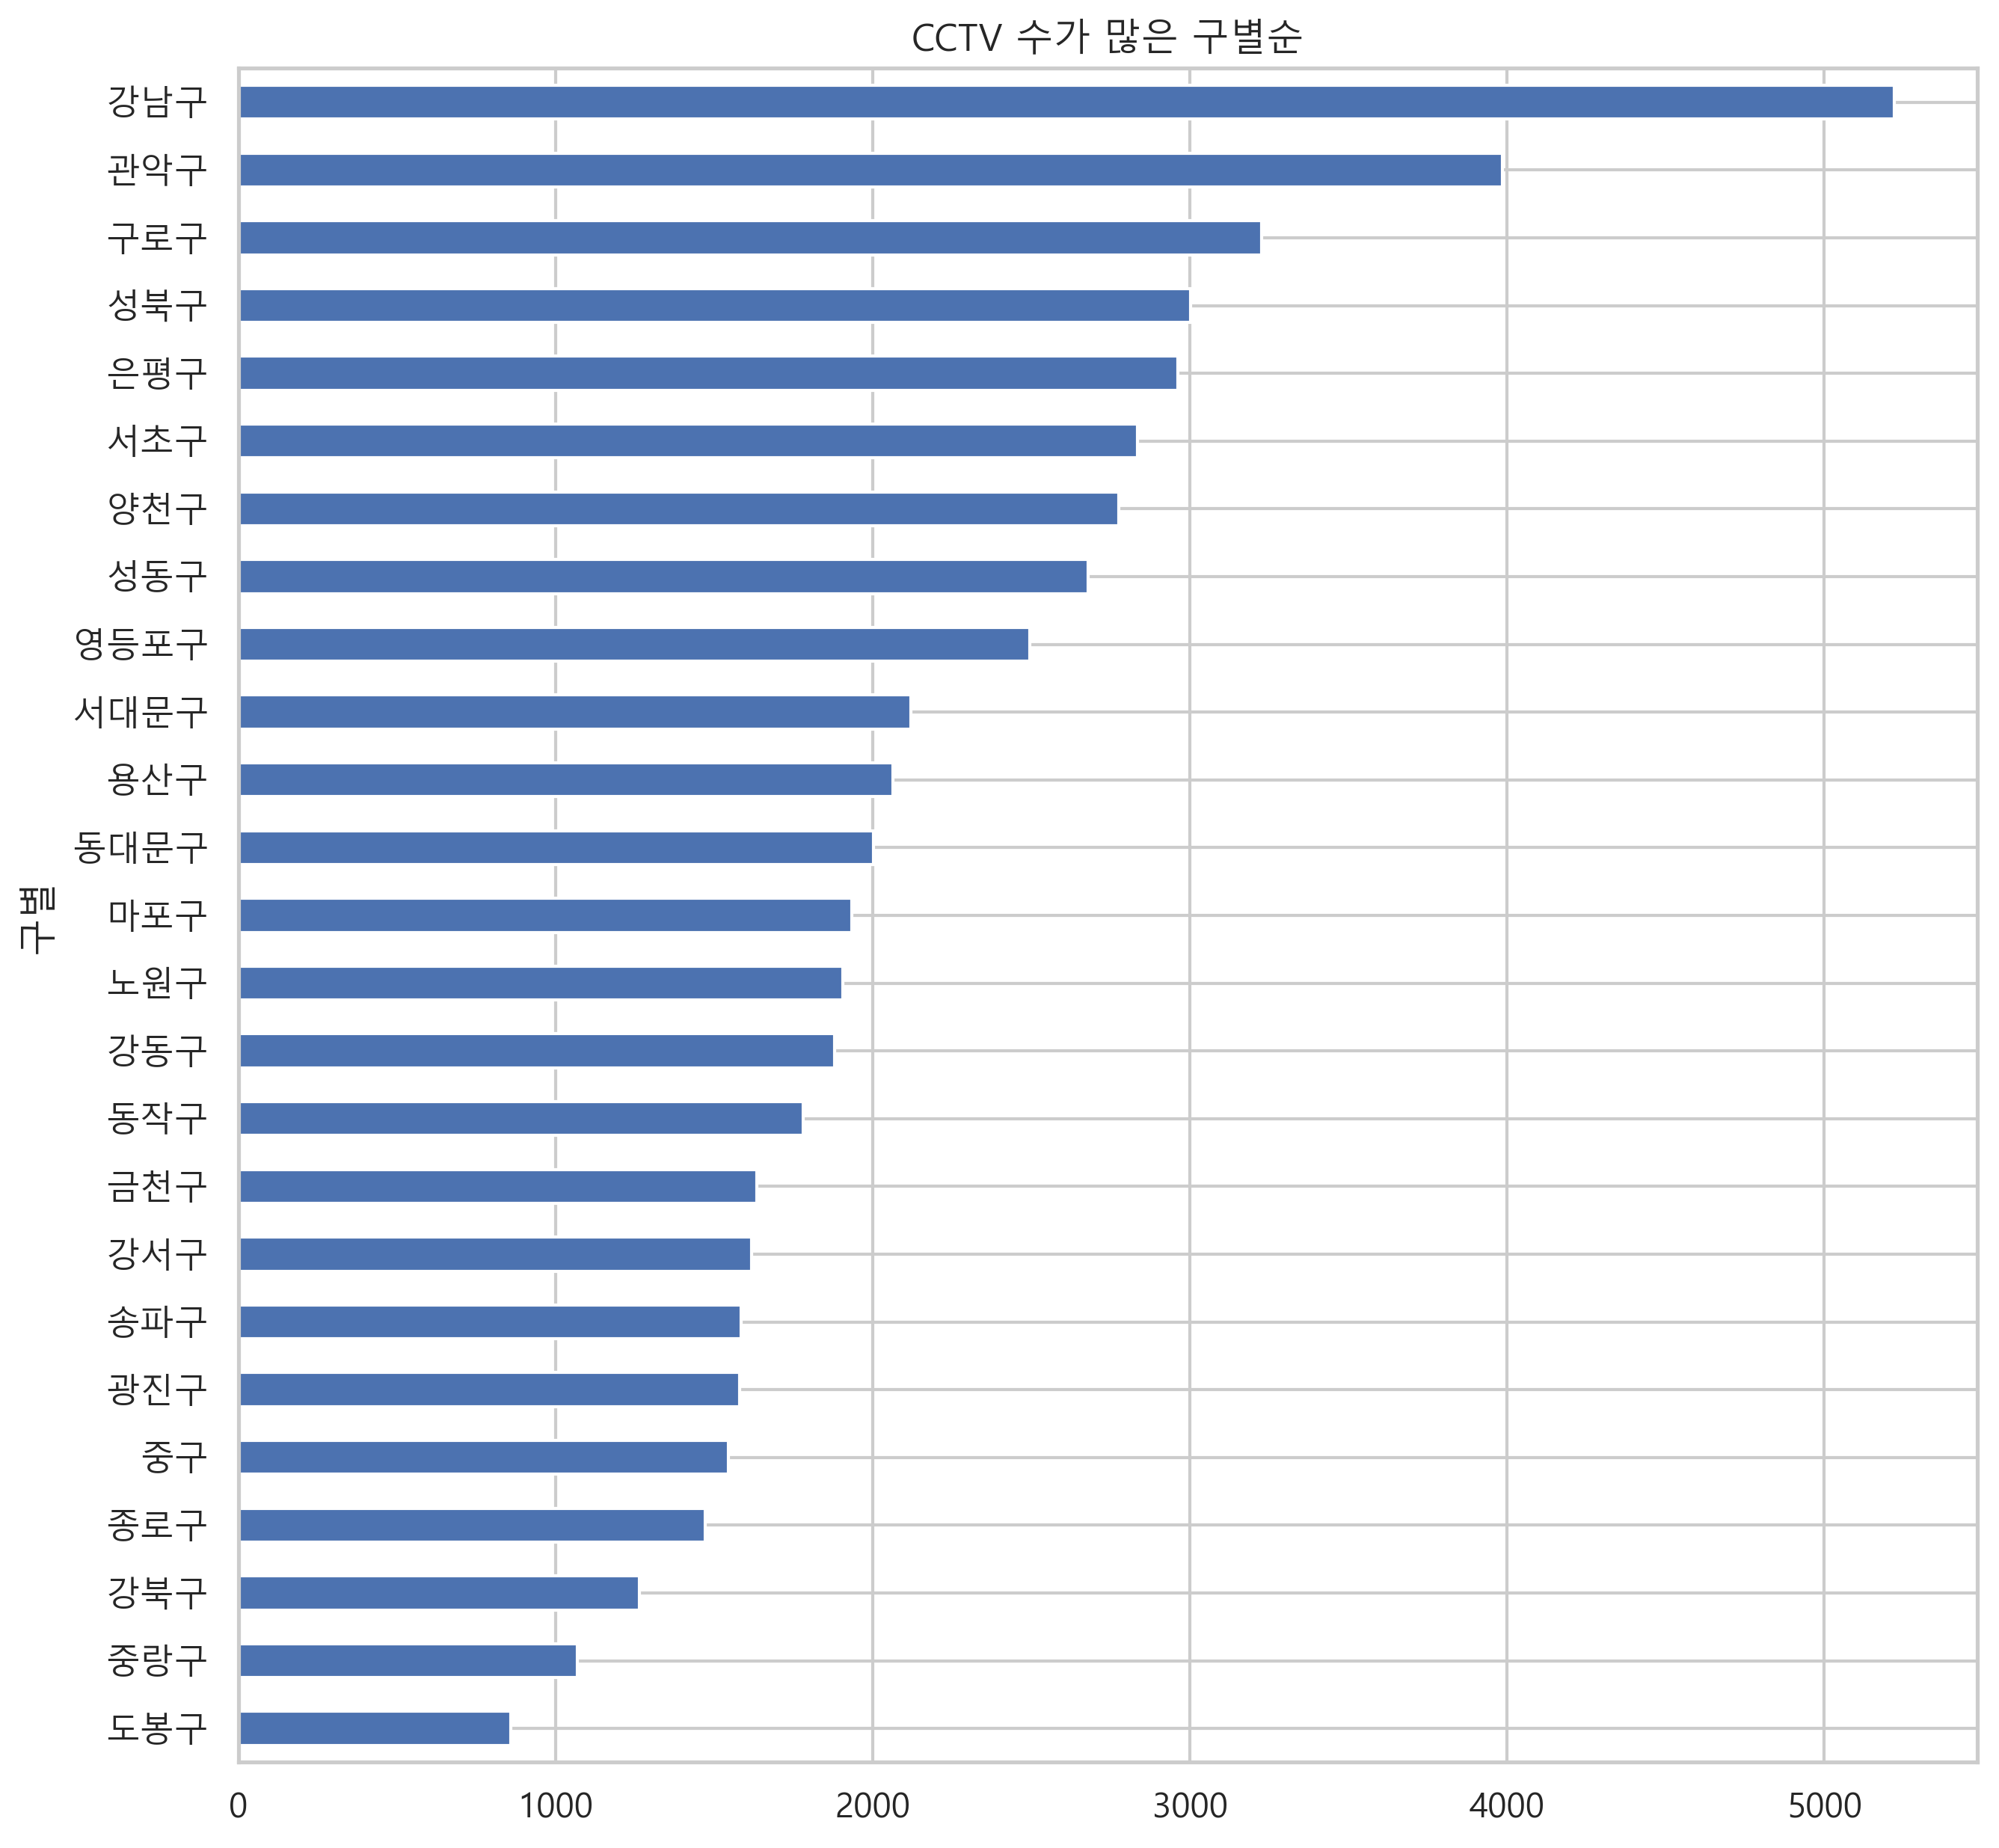

In [44]:
# 정렬된 수평bar
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.title('CCTV 수가 많은 구별순')
plt.show()

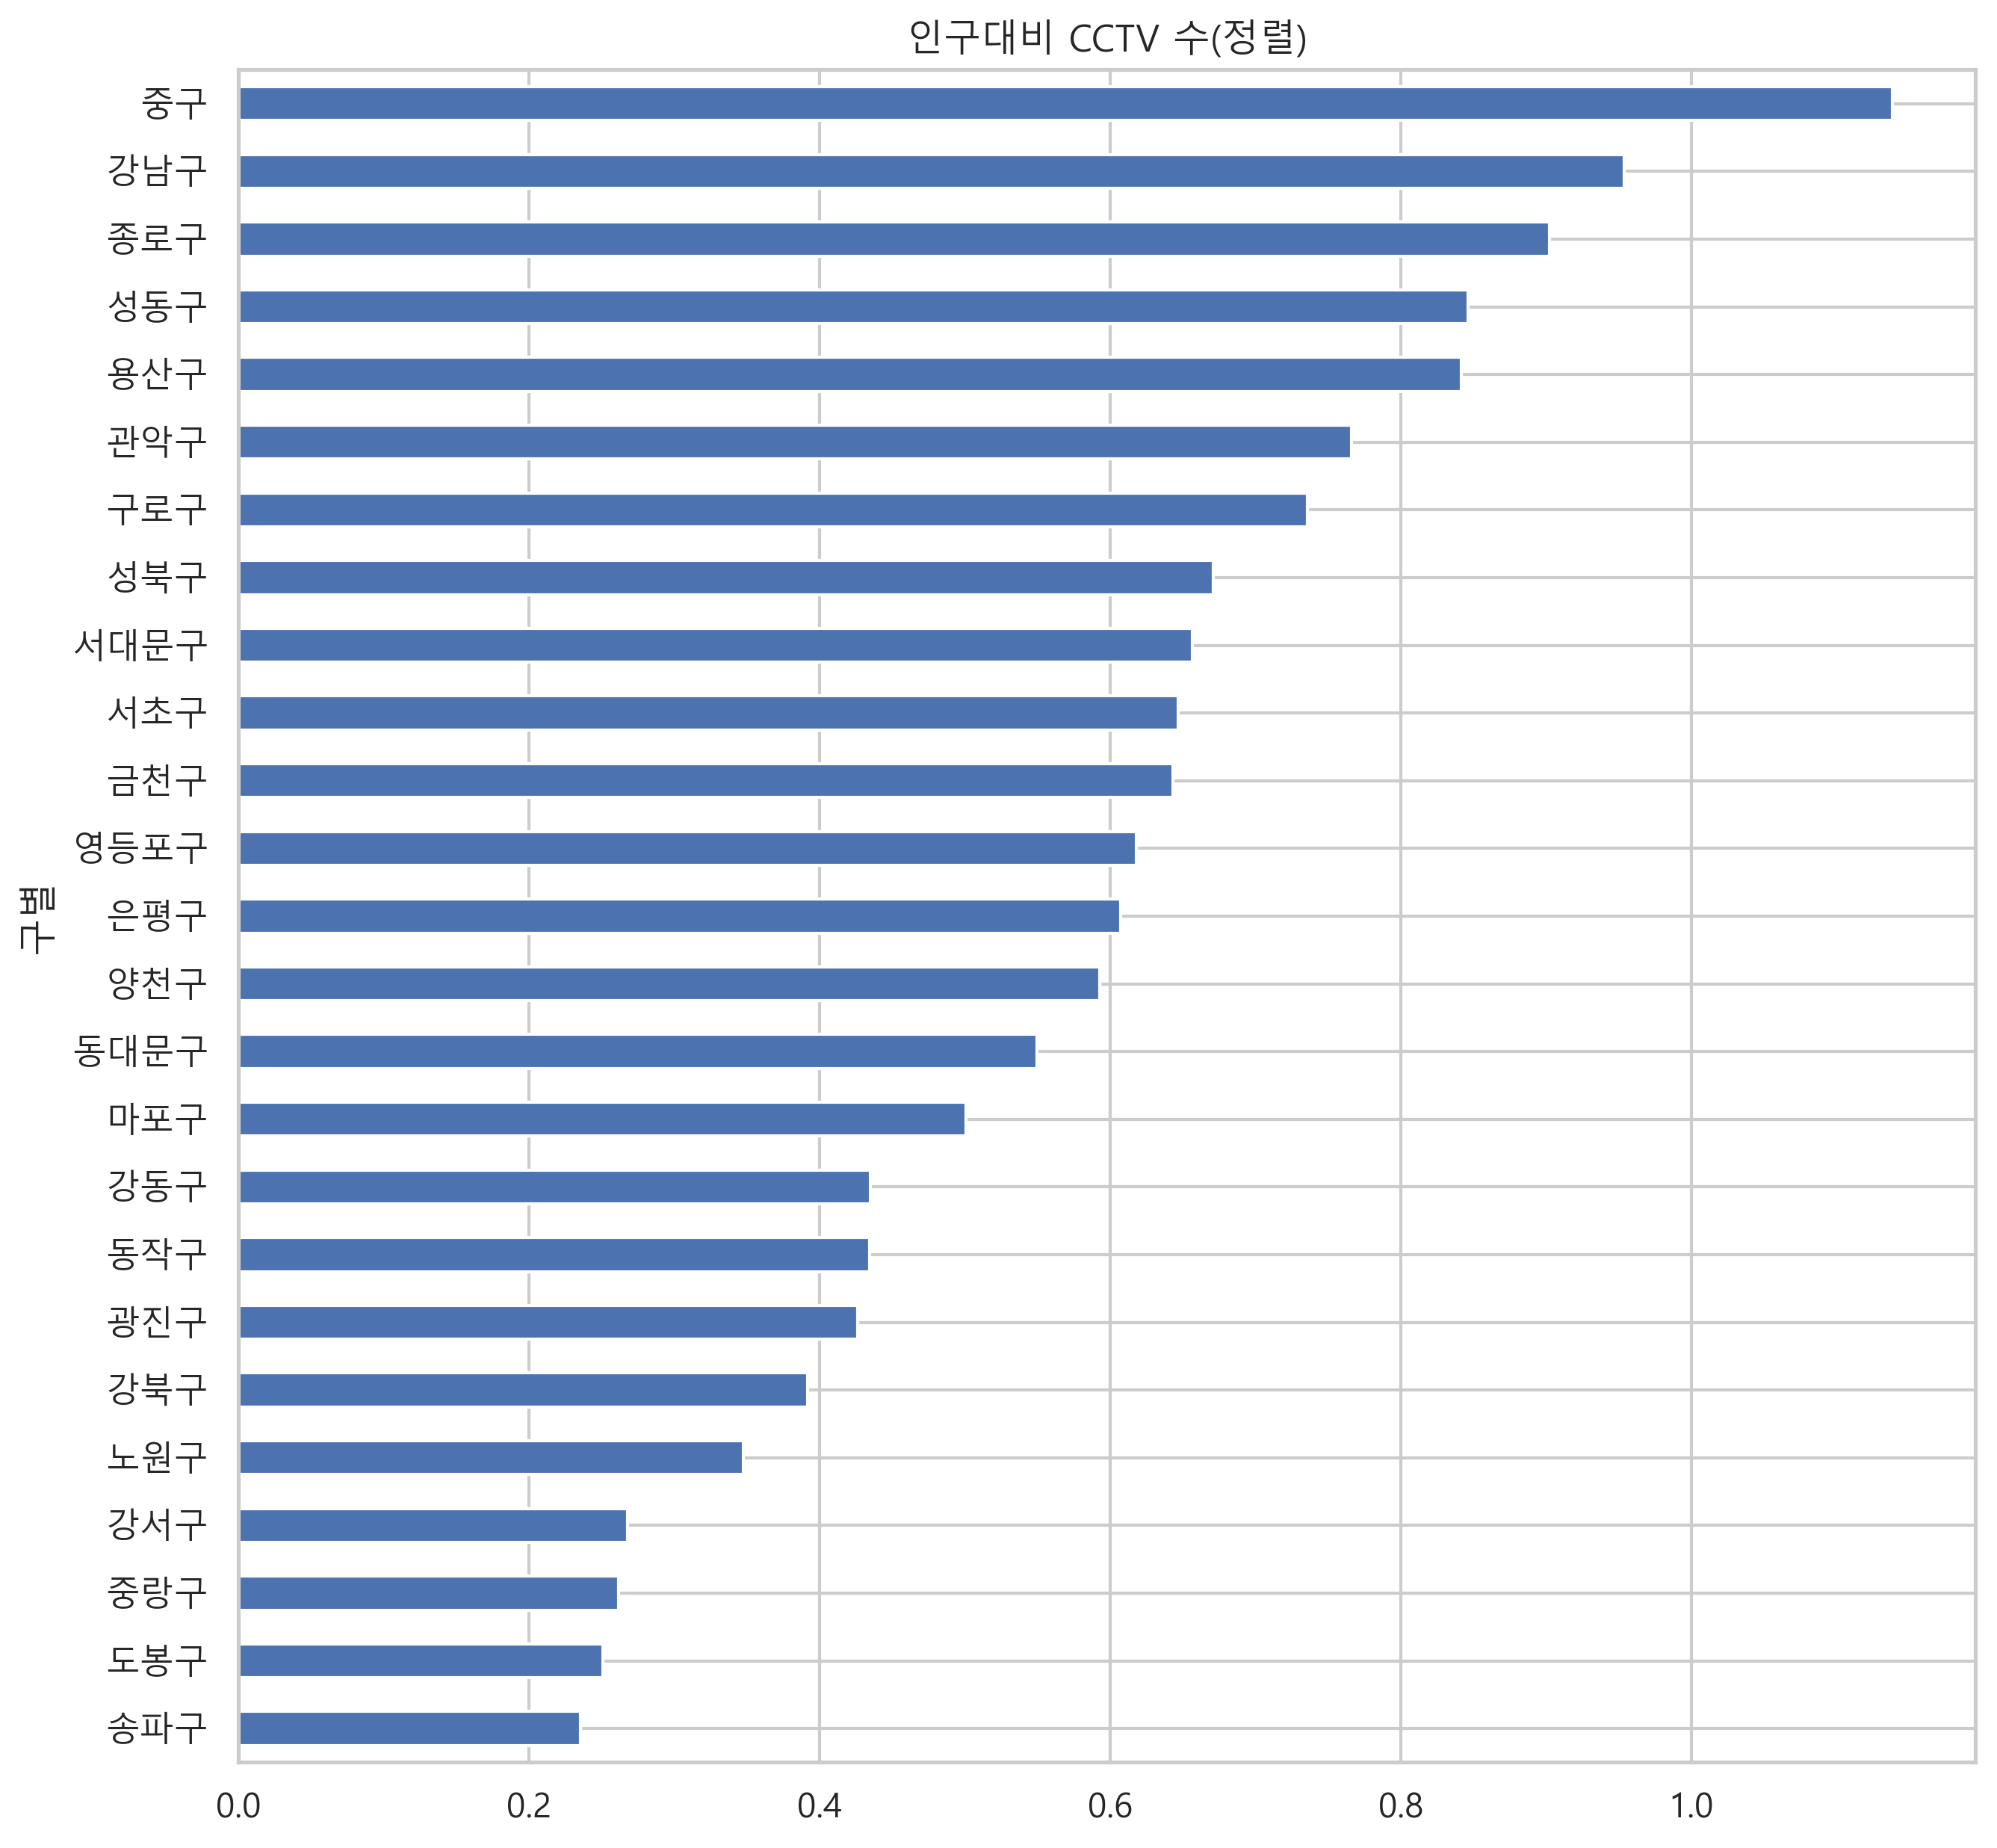

In [45]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.title('인구대비 CCTV 수(정렬)')
plt.show()

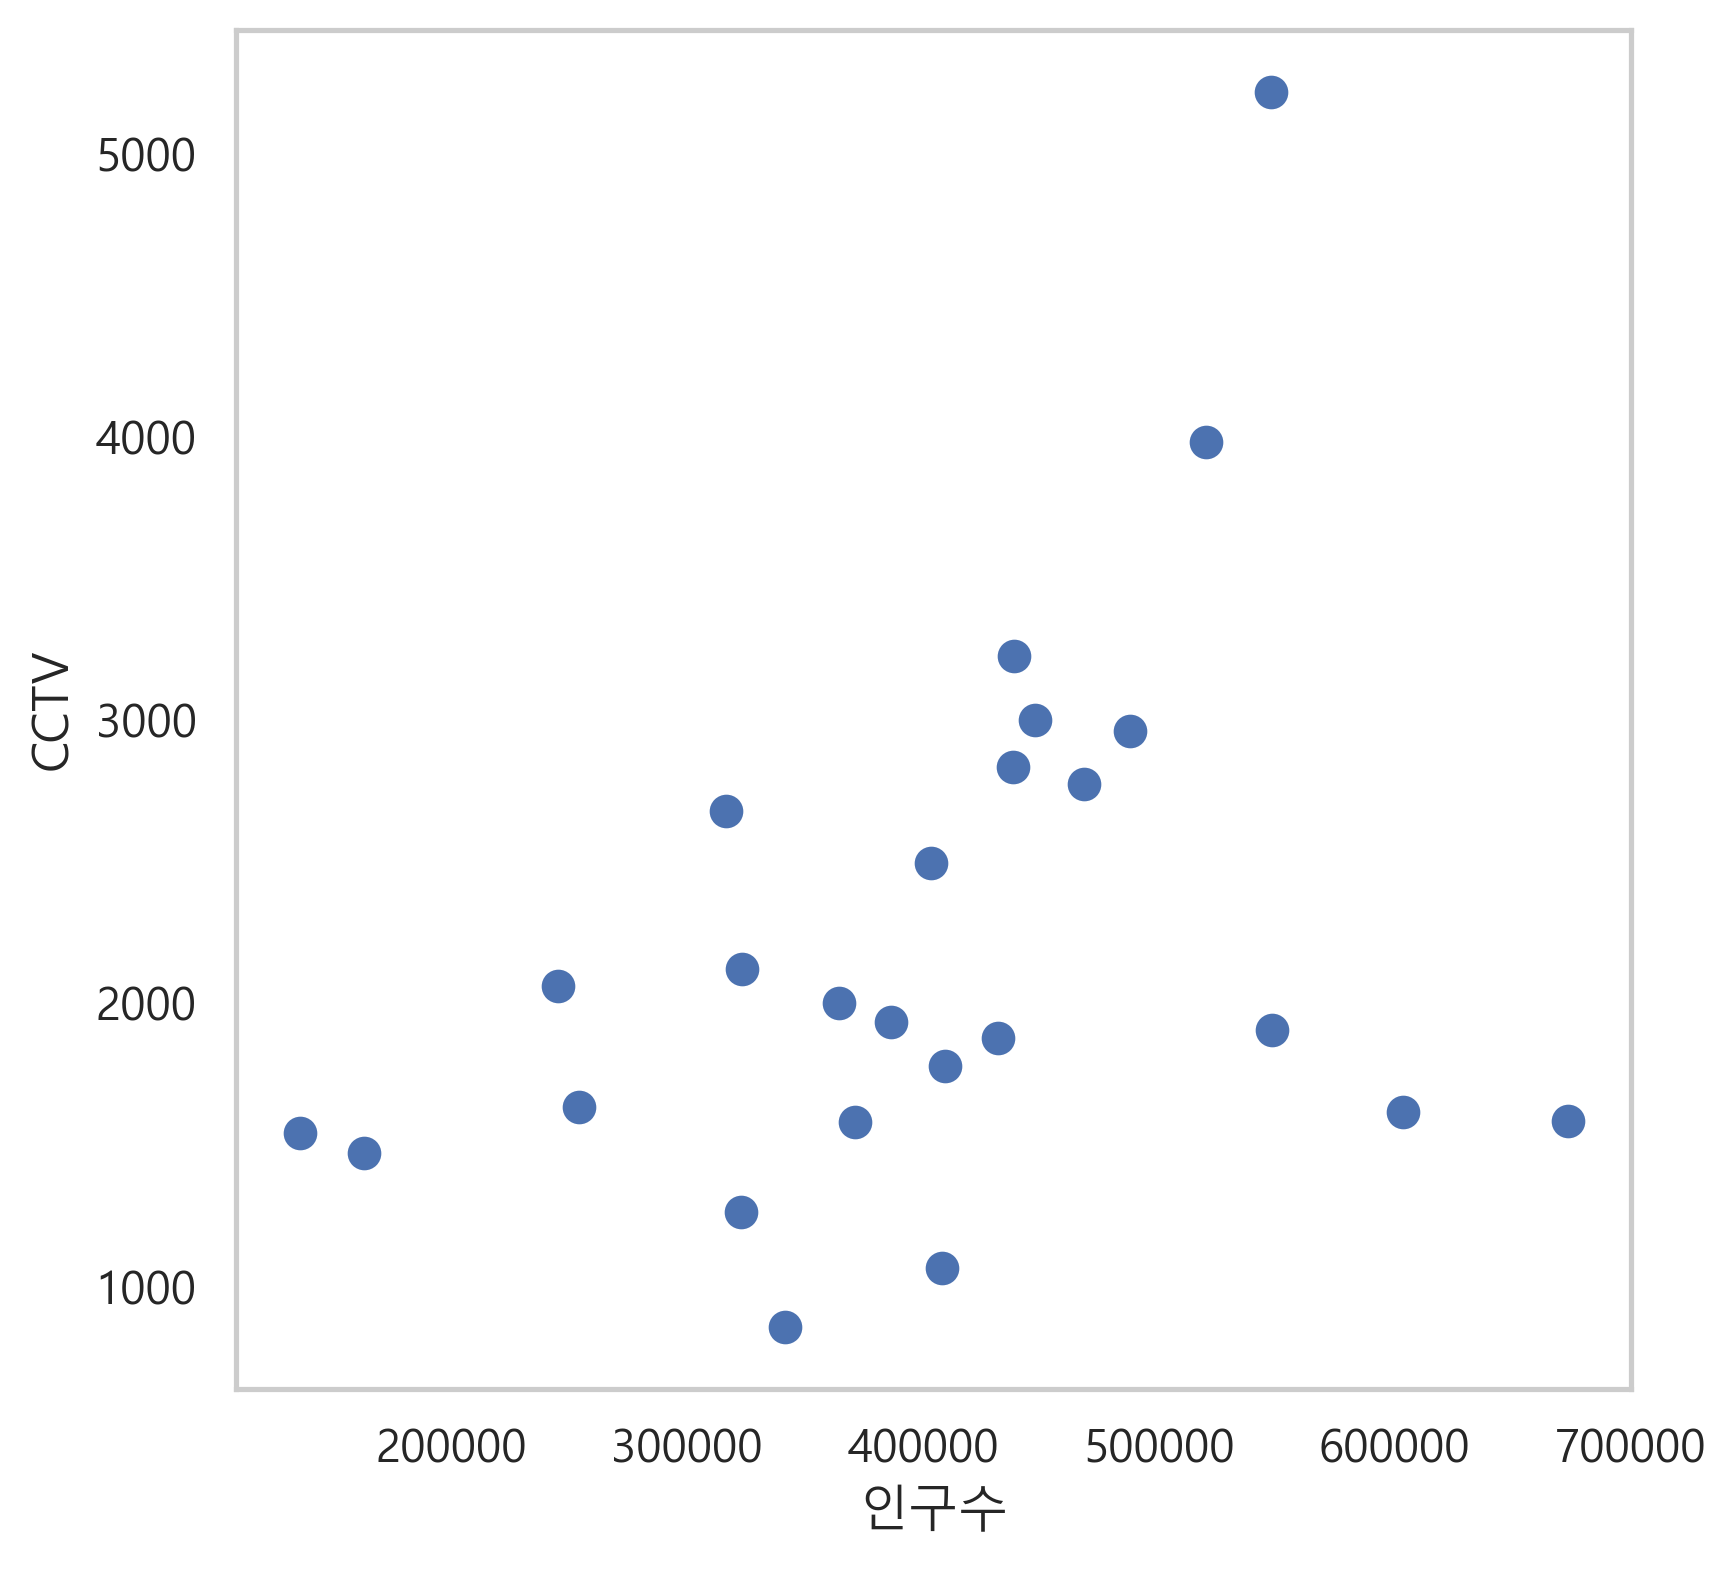

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [53]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.85240371e-03, 1.07309855e+03])

#### np.polyfit
https://pinkwink.kr/1127

In [54]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

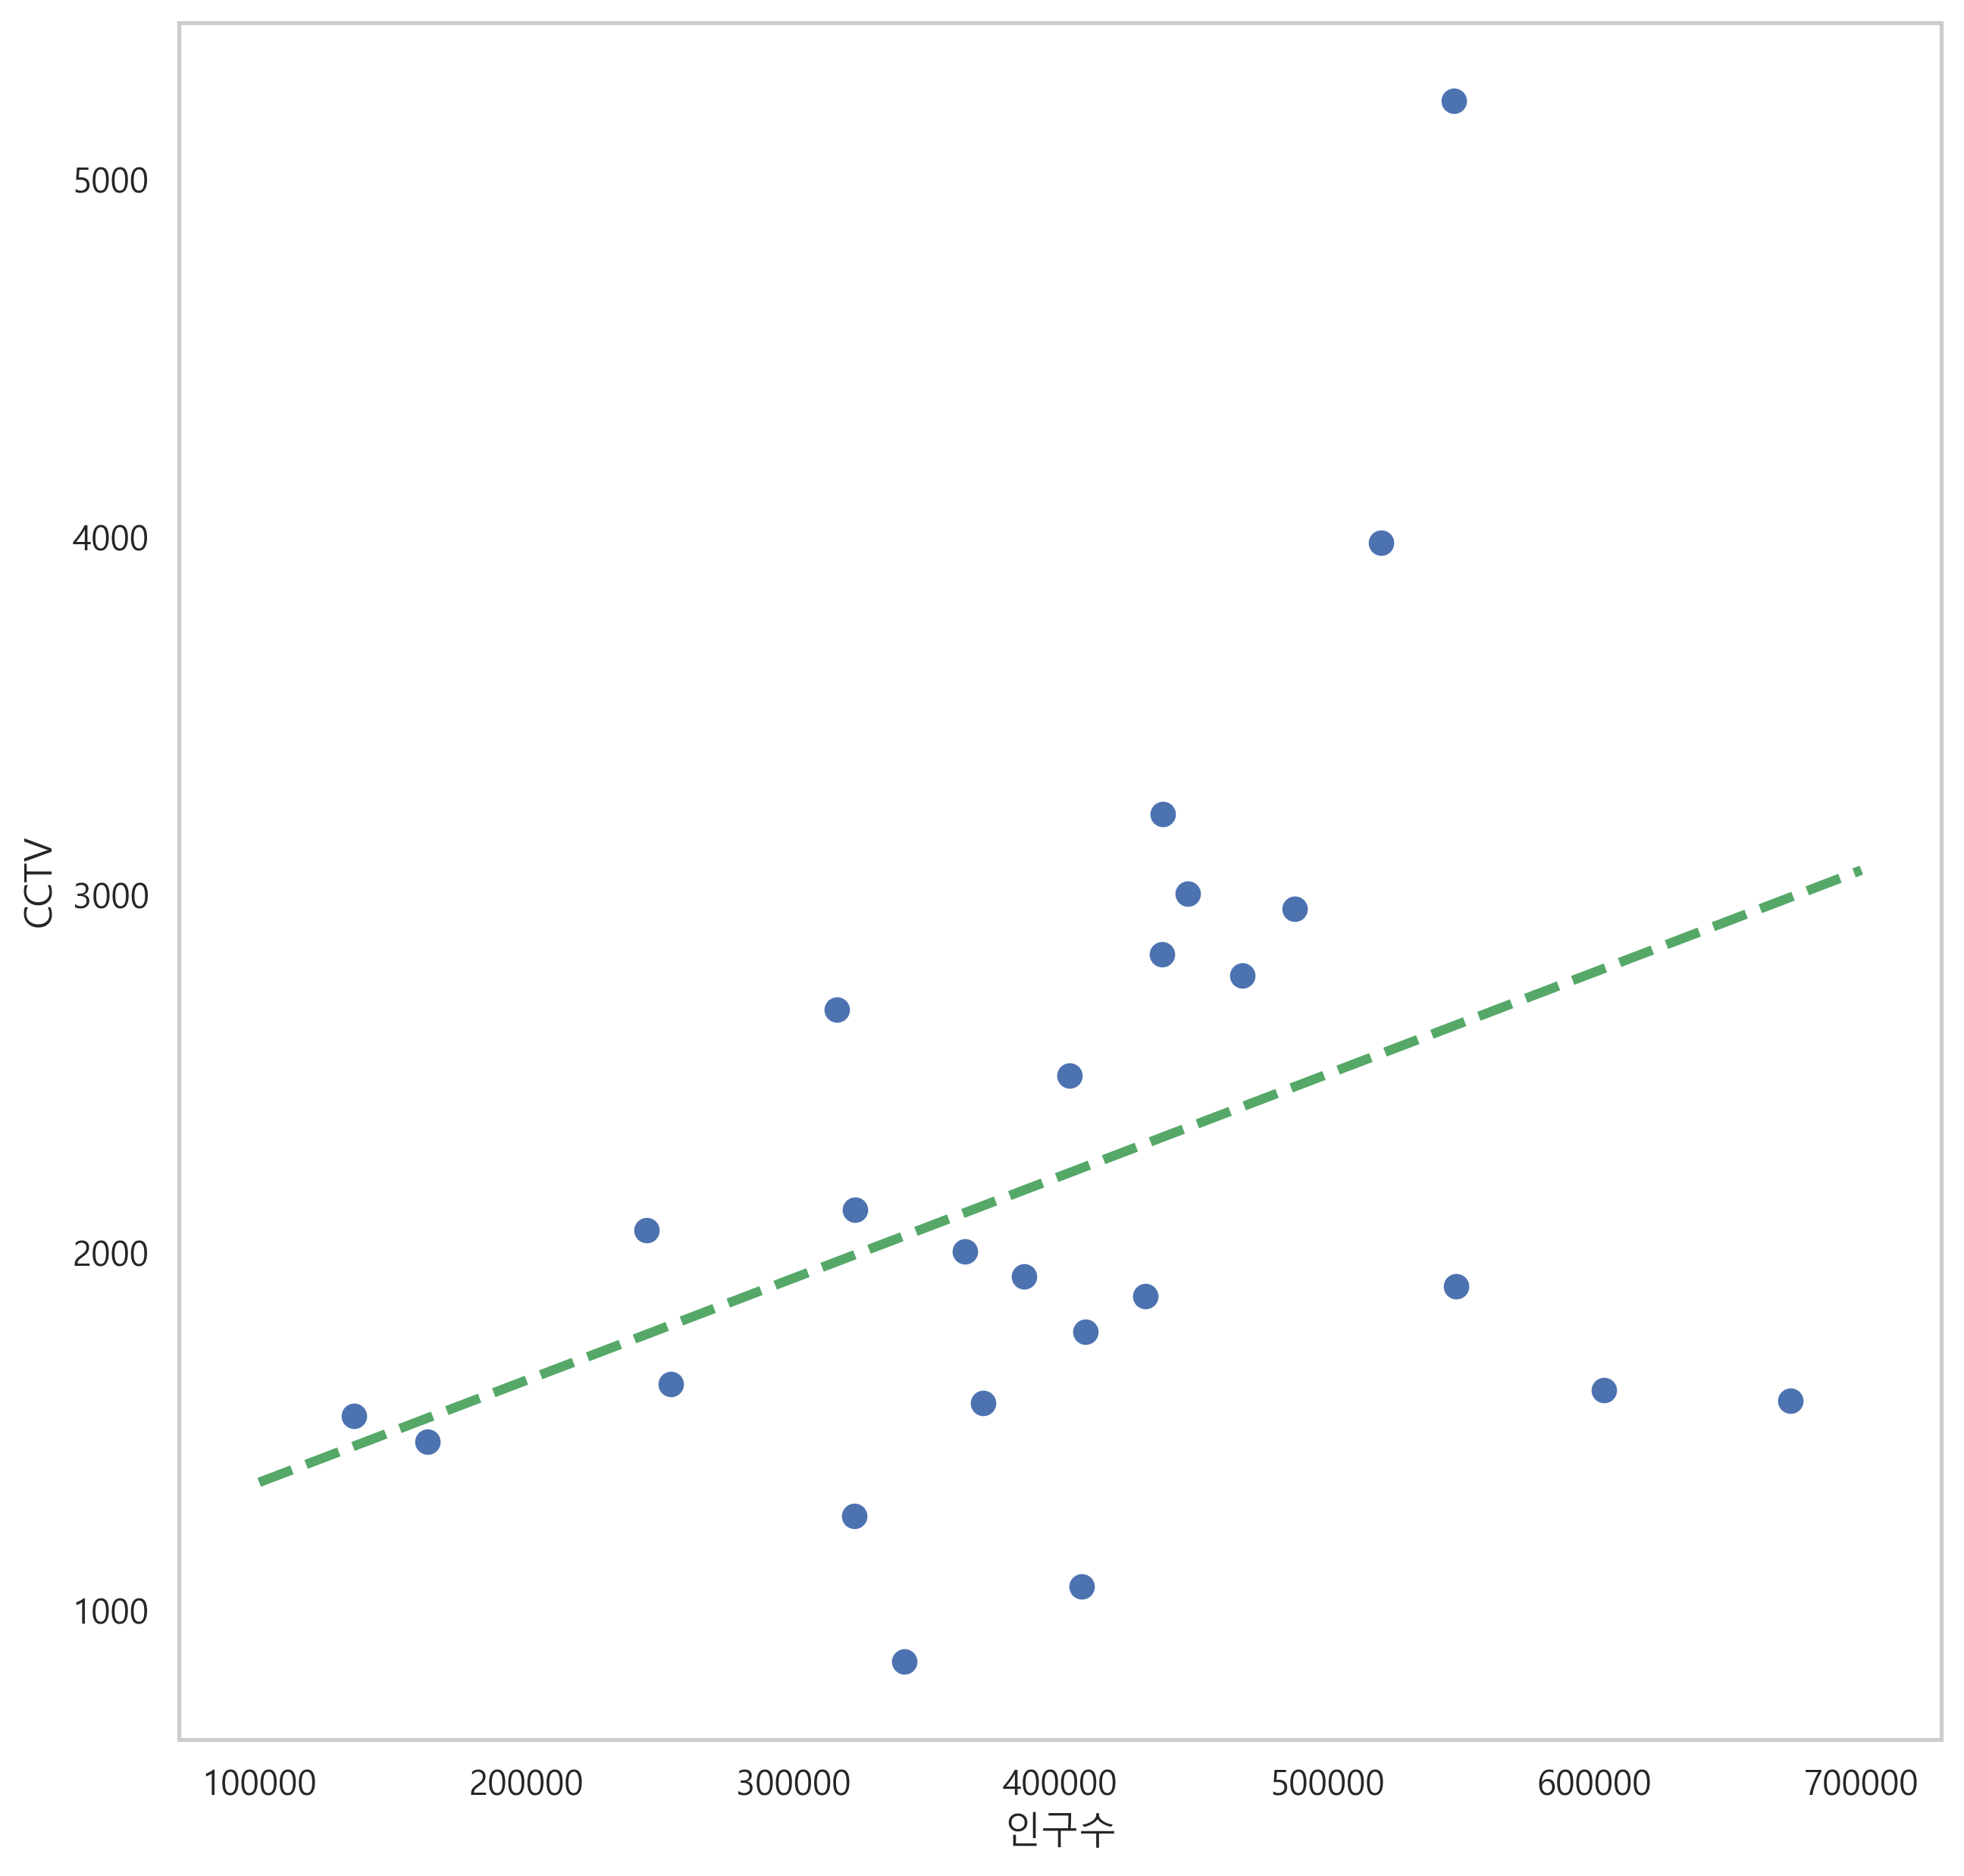

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [51]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.to_csv('data/01. CCTV_result_2018.csv')
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,875.316456,547453,542364,5089,67085,0.929578,12.254020,0.953689,2586.344483
관악구,3985,735.083532,520040,501957,18083,72249,3.477233,13.892970,0.766287,1428.537426
송파구,1586,907.954545,673507,666635,6872,81364,1.020331,12.080647,0.235484,1408.212414
도봉구,858,7337.500000,341649,339413,2236,55964,0.654473,16.380554,0.251135,1189.619423
강서구,1617,953.389831,603611,596949,6662,79660,1.103691,13.197241,0.267888,1177.840805


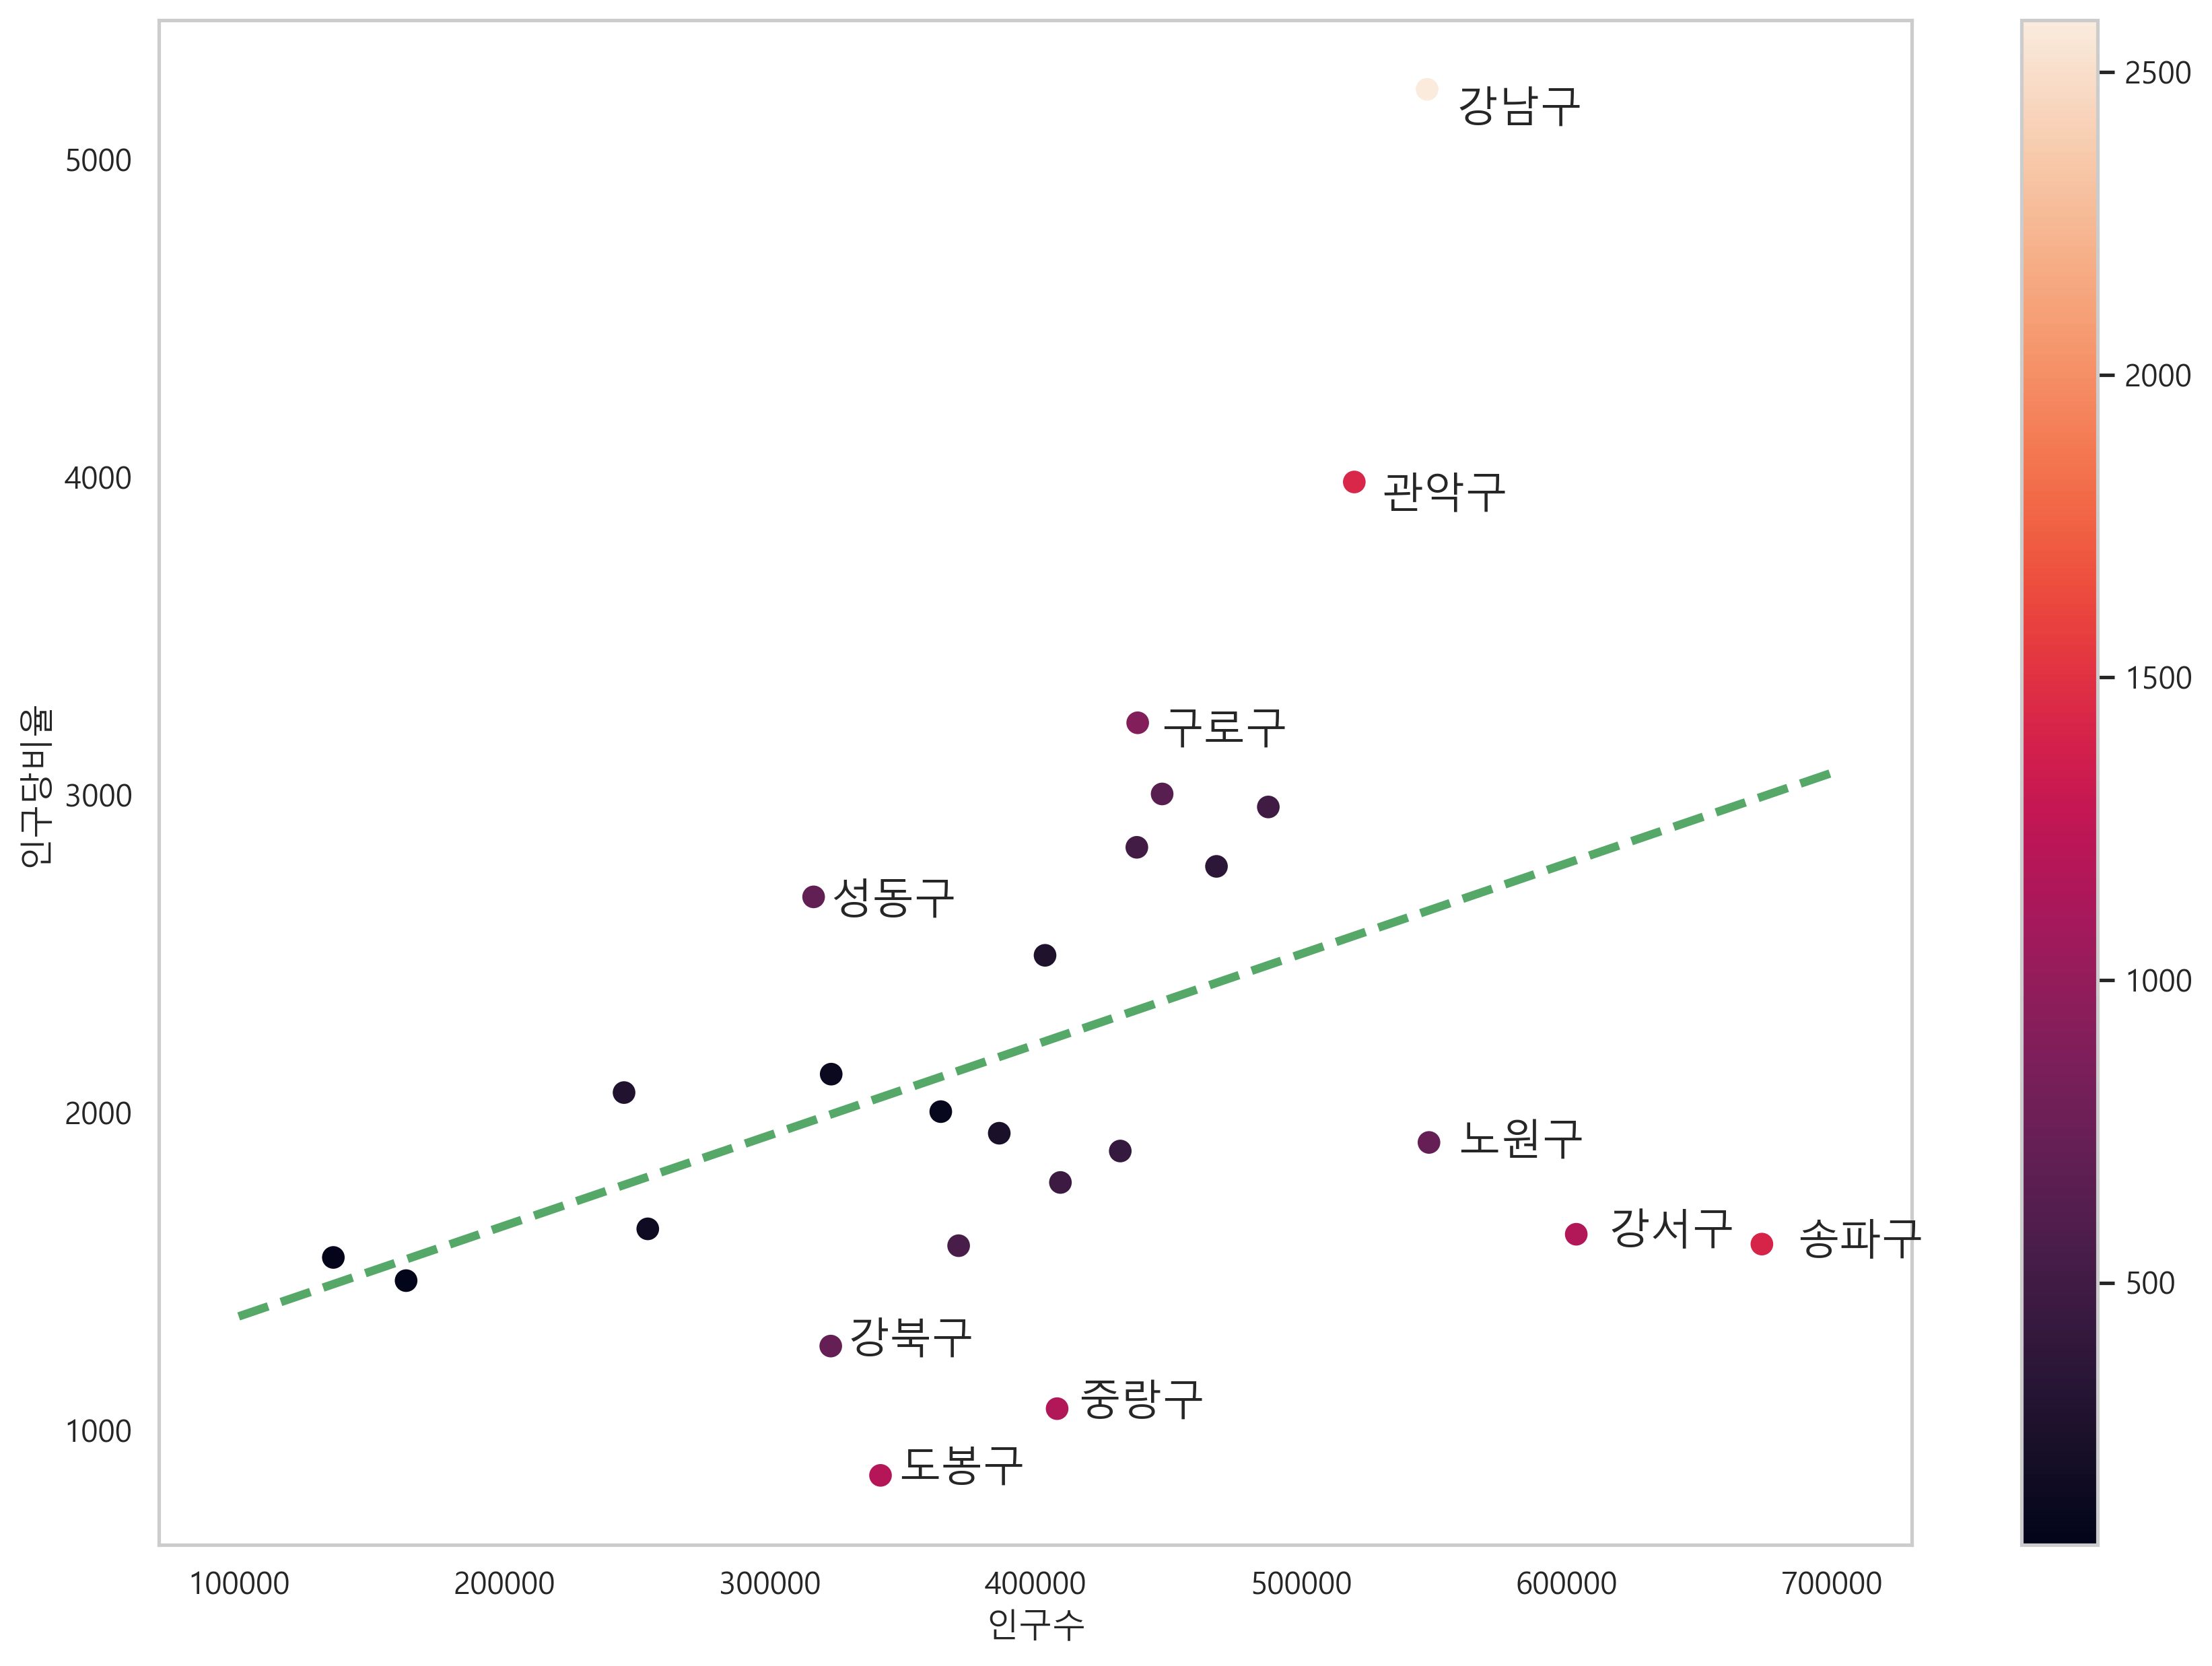

In [57]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 관악구, 구로구, 성동구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 중랑구는 다른 구에 비해 CCTV 비율이 낮다